# Key Concepts and markdown Summary for ensemble methdos

## Ensemble methods Overview

Ensemble methods combine multiple models (weak learners) to improve accuracy and robustness. Common techniques include Bagging, Boosting, and Random Forests.

### Bias-Variance Tradeoff 

| Aspect | Bagging | Boosting |
| --- | --- | --- |
| Bias | Reduces variance, minimal impact on bias | Reduces both |
| Variance | great reduction due to aggregation | moderate reduction with focus on errors |
| Handling Overfitting | Reduces overfitting | Prone to overfitting if weak learners are too complex |
| Parallelization | Can be parallelized | Sequential |

###  Bagging (Bootstrap Aggregating)
- Concept:

    - Creates multiple bootstrap samples from the data (random samples with replacement).
    - Trains a model on each sample and combines predictions (averaging for regression, majority vote for classification).

- Key Points:

    - Reduces variance and improves stability.
    - Works well with high-variance models like Decision Trees.
- Common Example: Random Forests (adds random feature selection to de-correlate trees).

### Random Forest
- Concept:

    - Extends Bagging by training multiple decision trees on random subsets of data and features.
    - Aggregates results via majority vote or averaging.

- Advantages:

    - Handles both regression and classification.
    - Provides feature importance scores.

- Applications:

    - Feature selection, classification, and regression tasks.
    
    
### Boosting
- Concept:

    - Sequentially trains weak models, focusing on correcting errors of previous models.
    - Adjusts sample weights to emphasize misclassified points.
- Types of Boosting:

    - AdaBoost:
        - Combines weak classifiers (e.g., decision stumps) by weighting their contributions based on accuracy.
    - Gradient Boosting:
        - Minimizes a loss function using gradient descent.
        - Handles regression and classification tasks.
    - XGBoost/LightGBM:
        - Optimized versions of Gradient Boosting for speed and performance.

| Method |	Strengths |	Limitations	| Best Use Cases |
| ---- | ---- | ---- | ---- |
| Bagging |	Reduces variance, handles overfitting. | Requires many models, computationally intensive. |	High-variance models (e.g., Decision Trees). |
| Random Forest | Handles missing data, ranks features. | Loses interpretability compared to single trees. | Feature importance, large datasets. |
| Boosting |	Reduces bias and variance, highly accurate. |	Sensitive to noise and overfitting. | Tasks demanding high accuracy (e.g., fraud detection). |

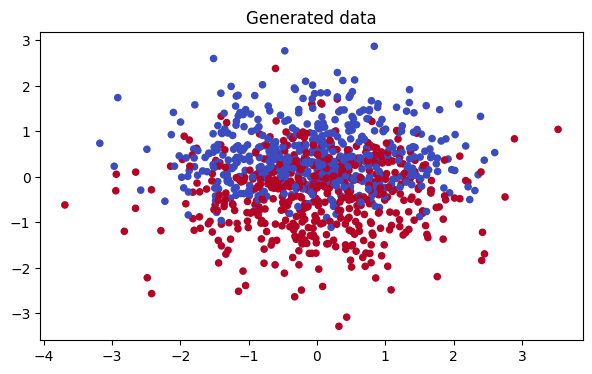

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Generate synthetic data
X, y = make_classification(n_samples=1000, n_features=20, random_state=42)

plt.figure(figsize=(7, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=20)
plt.title('Generated data')
plt.show()

# Bagging with decision trees

Bagging Accuracy: 0.87


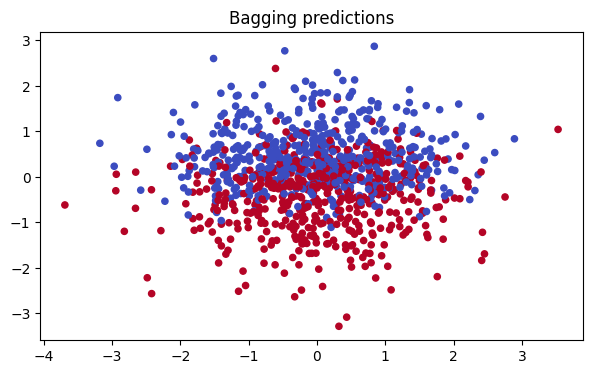

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Bagging Classifier
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)

print(f"Bagging Accuracy: {bagging.score(X_test, y_test):.2f}")

predictions_bagging = bagging.predict(X)
plt.figure(figsize=(7, 4))
plt.scatter(X[:, 0], X[:, 1], c=predictions_bagging, cmap='coolwarm', s=20)
plt.title('Bagging predictions')
plt.show()


# Random forest

Random Forest Accuracy: 0.85


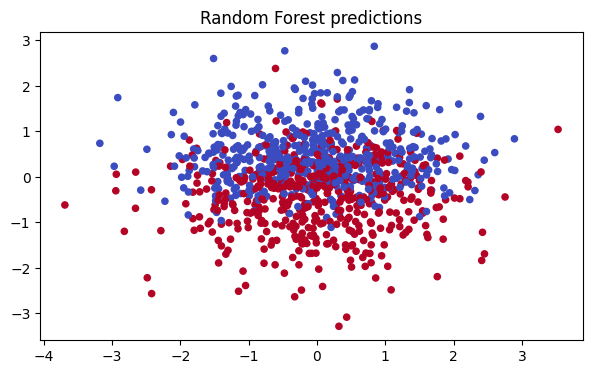

In [54]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=50, random_state=42)
rf.fit(X_train, y_train)

print(f"Random Forest Accuracy: {rf.score(X_test, y_test):.2f}")

predictions_rf = rf.predict(X)
plt.figure(figsize=(7, 4))
plt.scatter(X[:, 0], X[:, 1], c=predictions_rf, cmap='coolwarm', s=20)
plt.title('Random Forest predictions')
plt.show()


# Adaboost

In [55]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Classifier with SAMME algorithm
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42, algorithm='SAMME')
adaboost.fit(X_train, y_train)

print(f"AdaBoost Accuracy: {adaboost.score(X_test, y_test):.2f}")


AdaBoost Accuracy: 0.85


# Gradient boosting for regression

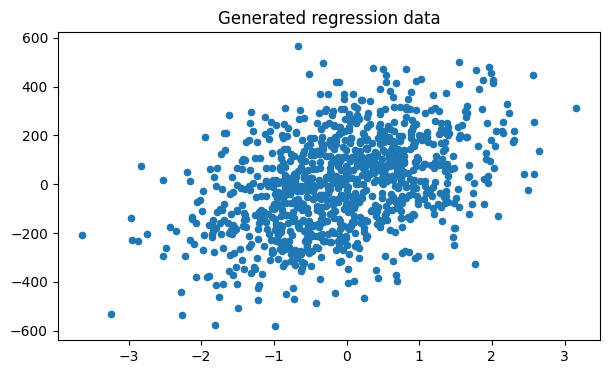

In [56]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression

# Generate regression data
X, y = make_regression(n_samples=1000, n_features=20, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

plt.figure(figsize=(7, 4))
plt.scatter(X[:, 0], y, s=20)
plt.title('Generated regression data')
plt.show()

Gradient Boosting R^2: 0.91


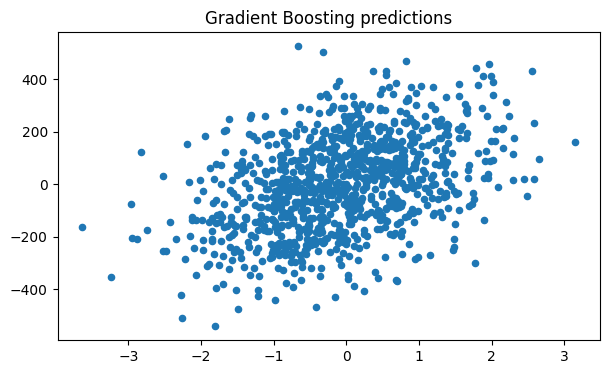

In [57]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

print(f"Gradient Boosting R^2: {gbr.score(X_test, y_test):.2f}")

predictions_gbr = gbr.predict(X)
plt.figure(figsize=(7, 4))
plt.scatter(X[:, 0], predictions_gbr, s=20)
plt.title('Gradient Boosting predictions')
plt.show()

# Applying Ensemble techniques to complex data

In [63]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import pandas as pd

# Load Wine Dataset
wine = load_wine()
X = wine.data
y = wine.target
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.3, random_state=42)

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


##  Types of voting classifiers

| type | how it works | use case |
| --- | --- | --- | 
| Hard voting | majority vote | Use when you trust each model equally or when individual models have similar accuracies. |
| Soft voting | average probabilities | Use when models are probabilistic (e.g., Logistic Regression, Random Forest) and their confidence is meaningful.

### Hard voting

In [74]:
# Define base models
rf = RandomForestClassifier(random_state=42)
gb = GradientBoostingClassifier(random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Hard Voting Classifier
hard_voting = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('lr', lr)], voting='hard')
hard_voting.fit(X_train, y_train)

print(f"Hard Voting Accuracy: {hard_voting.score(X_test, y_test):.2f}")

# Cross-validation for Voting Classifier
cv_scores = cross_val_score(hard_voting, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

y_pred = hard_voting.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Hard Voting Accuracy: 1.00


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Cross-Validation Accuracy: 0.96 ± 0.02
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        14

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Soft voting

In [75]:
# Soft Voting Classifier
soft_voting = VotingClassifier(estimators=[('rf', rf), ('gb', gb), ('lr', lr)], voting='soft')
soft_voting.fit(X_train, y_train)

print(f"Soft Voting Accuracy: {soft_voting.score(X_test, y_test):.2f}")

# Cross-validation for Voting Classifier
cv_scores = cross_val_score(soft_voting, X, y, cv=5)
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

y_pred = soft_voting.predict(X_test)
print(classification_report(y_test, y_pred))

c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Soft Voting Accuracy: 0.96


c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/

Cross-Validation Accuracy: 0.97 ± 0.02
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        19
           1       1.00      0.90      0.95        21
           2       1.00      1.00      1.00        14

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.97      0.96      0.96        54



c:\Users\Marti\OneDrive\Escritorio\ML AI DL\environment\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Variation between models

1. Decision Trees + Logistic Regression
    - Combines interpretable models (Logistic Regression) with more complex ones (Decision Trees).
    - Balances interpretability with complexity.
    
2. K-Nearest Neighbors + Support Vector Machines
    - Combines distance-based (KNN) and decision boundary-based (SVM) models.
    - Captures different aspects of the data.
    
3. Random Forest + Gradient Boosting
    - Combines Bagging (Random Forest) with Boosting (Gradient Boosting).
    - Reduces variance and bias.
    
4. Linear Regression + Polynomial Regression
    - Combines linear and non-linear models.
    - Captures both linear and non-linear relationships.
    
5. K-Nearest Neighbors + Random forest
    - Combines distance-based (KNN) and ensemble (Random Forest) models.
    - Captures local and global patterns.
    
6. Naive Bayes + Gradient boosting
    - Combines simple (Naive Bayes) and complex (Gradient Boosting) models.
    - Balances simplicity with accuracy.
    
7. SVM + NN
    - SVM handles linear separability well, while neural networks capture non-linear relationships.

## Innovative bagggin + boosting example

### Stacking : bagging + boosting

In [76]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier

# Stacking Classifier
stacking = StackingClassifier(estimators=[('rf', rf), ('gboost', GradientBoostingClassifier(random_state=42))], final_estimator=LogisticRegression())
stacking.fit(X_train, y_train)

# Evaluate
y_pred = stacking.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred):.2f}")

y_pred = stacking.predict(X_test)
print(classification_report(y_test, y_pred))


Stacking Classifier Accuracy: 0.98
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.95      1.00      0.98        21
           2       1.00      0.93      0.96        14

    accuracy                           0.98        54
   macro avg       0.98      0.98      0.98        54
weighted avg       0.98      0.98      0.98        54



### Bagging  

In [71]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Bagging with KNN
bagging_knn = BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=5), n_estimators=50, random_state=42)
bagging_knn.fit(X_train, y_train)

print(f"Bagging (KNN) Accuracy: {bagging_knn.score(X_test, y_test):.2f}")


Bagging (KNN) Accuracy: 0.74


In [77]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# Define base models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Define meta-model
meta_model = LogisticRegression(max_iter=1000)

# Stacking Classifier
stacking = StackingClassifier(
    estimators=[('rf', rf), ('gb', gb)],
    final_estimator=meta_model
)

# Train the stacking classifier
stacking.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = stacking.predict(X_test)
print(f"Stacking Classifier Accuracy: {accuracy_score(y_test, y_pred):.2f}")


Stacking Classifier Accuracy: 1.00
